# Librerias

In [1]:
#Importar librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import sqlalchemy
from matplotlib.pyplot import figure
from datetime import timedelta
#Eliminar espacios en blanco de las columnas
def trim_all_columns(df):
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

paleta1="ch:2.5,-.2,dark=.3"
paleta2 =sns.color_palette("bright", 10)
color1='teal'

# Lectura DF

In [2]:
#coneccion a las bases de datos
cnx_hour = sqlite3.connect('hour.db') 
cnx_month = sqlite3.connect('month.db')
cnx_year = sqlite3.connect('year.db')
#get table names
res = cnx_month.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print(name[0])

marginal_cost
demand_bus
level_dam
power_generator


In [3]:
#Lectura de tablas de sql a pandas
#hour
cmg= pd.read_sql_query("SELECT * From 'marginal_cost' ",cnx_month)
# lineh= pd.read_sql_query("SELECT * From 'flow_line' ",cnx_hour)
bar= pd.read_sql_query("SELECT * From 'demand_bus' ",cnx_month)
#emb= pd.read_sql_query("SELECT * From 'level_dam' ",cnx_month)
gen= pd.read_sql_query("SELECT * From 'power_generator' ",cnx_month)
#ener=pd.read_sql_query("SELECT * From 'energy_generator' ",cnx_month)
#tech=pd.read_sql_query("SELECT * From 'energy_technology' ",cnx_month)
#vol= pd.read_sql_query("SELECT * From 'volume_dam' ",cnx_month)
# lineh2= pd.read_sql_query("SELECT * From 'flow_line_perc' ",cnx_hour)


In [14]:
#Lectura DF PLP
df1=pd.read_csv('/home/pcontreras/demanda-real/plpbar.csv',dtype={"Hidro":str})
df2=pd.read_csv('/home/pcontreras/demanda-real/bloques.csv',encoding='latin1',dtype={"Año":str})
#df3=pd.read_csv('/home/cdominguez/RD/uni/plpemb.csv',dtype={'EmbNom':str})
#df4=pd.read_csv('/home/cdominguez/RD/uni/embalses.csv',dtype={'Nombre':str})
df5=pd.read_csv('/home/pcontreras/demanda-real/plpcen.csv',dtype={"CenNom":str,"Hidro":str,"Año":str})
df6=pd.read_csv('/home/pcontreras/demanda-real/tecnologias.csv',encoding='latin1',dtype={"cen_name":str,"cen_type":str})
#df7=pd.read_csv('/home/cdominguez/RD/uni/plplin.csv',dtype={"LinNom":str,'Hidro':str})
#df8=pd.read_csv('/home/cdominguez/RD/uni/plpcostop.csv')

#Reemplazar NaN de tecnologias que faltan 
#df6=df6.fillna('Otro')
#Eliminar espacios en blanco de las columnas
df1 = trim_all_columns(df1)
df2 = trim_all_columns(df2)
#df3 = trim_all_columns(df3)
#df4 = trim_all_columns(df4)
df5 = trim_all_columns(df5)
df6 = trim_all_columns(df6)
#df7 = trim_all_columns(df7)
#df8 = trim_all_columns(df8)


# Cmg - CHEBYSHEV

## Promedio anual de Cmg

In [5]:
#lECTURA 
cmgy= pd.read_sql_query("SELECT * From 'marginal_cost' ",cnx_year)


/home/pcontreras/.local/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/pcontreras/.local/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


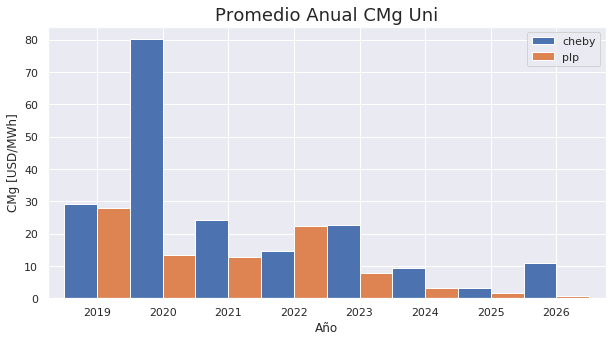

In [6]:
#Seteo Parámetros
hid='15'

####CHEBY###
#Filtrar por hid
dfbar=cmgy[(cmgy['scenario_id']==15)]

#Promedio anual
sr=pd.Series(dfbar.datetime) #datetime to serie
dfbar.loc[:,'Año']=pd.to_datetime(sr).dt.year #year attribute
result=dfbar.groupby('Año').mean()
result=result[:-1] #cheby tiró un año adicional, asi que borro esa fila 

####PLP####
#Filtrar por hidrologia
dfbar2=df1[df1['Hidro']==hid]
#merge por bloques entre dfbar y bloques.csv
# date=df2.groupby('Año').mean()
result2= pd.merge(dfbar2, df2, on='Bloque')
#Agrupar por año
result2=result2.groupby('Año').mean()
# result2.loc[:,'model']= ["plp" for x in range(len(result2))] #crea columna con tipo del modelo 
#se añade como columna a df de cheby
result.loc[:,'plp']=result2['CMgBar'].tolist()
result.loc[:,'cheby']=result['value'].tolist()
#Visualizacion
sns.set()
result[['cheby','plp']].plot.bar(rot=0,width=1, figsize=(10,5))
plt.ylabel('CMg [USD/MWh]'), plt.title('Promedio Anual CMg Uni', fontsize=18)
pass


## Promedio mensual de Cmg 

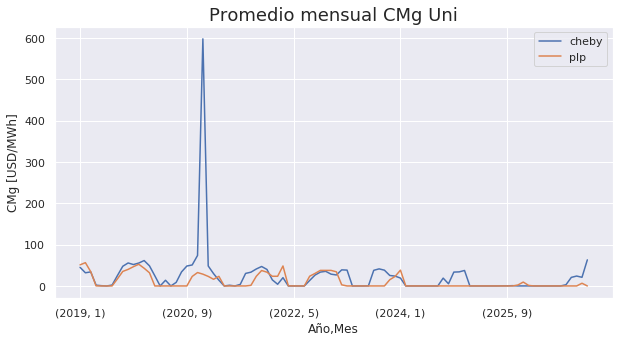

In [7]:
#Seteo Parámetros
hid='15'

####CHEBY###
#Filtrar por hid
dfbar=cmg[(cmg['scenario_id']==15)]

#Promedio por mes
sr=pd.Series(dfbar.datetime) #datetime to serie
dfbar.loc[:,'Año']=pd.to_datetime(sr).dt.year #year attribute
dfbar.loc[:,'Mes']=pd.to_datetime(sr).dt.month #month attribute
result=dfbar.groupby(['Año','Mes']).mean()
result['Mes_n']=np.arange(1,len(result)+1)
result=result[:-1] #cheby tiró un año adicional, asi que borro esa fila 

####PLP####
#Filtrar por hidrologia
dfbar2=df1[df1['Hidro']==hid]
#merge por bloques entre dfbar y bloques.csv
date=df2.groupby(['Año','Mes']).mean()
date['Mes_n']=np.arange(1,len(date)+1)
result2= pd.merge(dfbar2, date[['Bloque','Mes_n']], on='Bloque')
# #Agrupar por año
# result2=result2.groupby('Año').mean()
result2.loc[:,'model']= ["plp" for x in range(len(result2))] #crea columna con tipo del modelo 
#se añade como columna a df de cheby
result.loc[:,'plp']=result2['CMgBar'].tolist()
result.loc[:,'cheby']=result['value'].tolist()
#Visualizacion
sns.set()
result[['cheby','plp']].plot(figsize=(10,5))
plt.ylabel('CMg [USD/MWh]'), plt.title('Promedio mensual CMg Uni', fontsize=18)
pass

## CMg mensual promedio

In [ ]:
# #Seteo Parámetros
# bar='44'
# hid='15'
# bar_name='Valdesia_138'

# ####CHEBY###
# #Filtrar por barra 
# dfbar=cmgh[(cmgh['label']==bar)]

# #Promedio por año 
# sr=pd.Series(dfbar.datetime) #datetime to serie
# dfbar.loc[:,'Mes']=pd.to_datetime(sr).dt.month #year attribute
# result=dfbar.groupby('Mes').mean()


# ####PLP####
# #Filtrar por barra e hidrologia
# dfbar2=df1[(df1['BarNom']==bar_name) & (df1['Hidro']==hid)]
# #merge por bloques entre dfbar y bloques.csv
# result2= pd.merge(dfbar2, df2, on='Bloque')
# #Agrupar por año
# result2=result2.groupby('Mes').mean()
# result2.loc[:,'model']= ["plp" for x in range(len(result2))] #crea columna con tipo del modelo 
# #se añade como columna a df de cheby
# result.loc[:,'plp']=result2['CMgBar'].tolist()
# result.loc[:,'cheby']=result['value'].tolist()
# #Visualizacion
# sns.set()
# fig, ax = plt.subplots()
# fig.set_size_inches(9, 5) 
# sns.lineplot(x=result[['cheby','plp']].index,y='cheby',data=result[['cheby','plp']],color='b',label='cheby',linewidth=3)
# sns.lineplot(x=result[['cheby','plp']].index,y='plp',data=result[['cheby','plp']],color='orange',label='plp',linewidth=3)

# plt.ylabel('CMg [USD/MWh]'), plt.title('Promedio mensual CMg barra '+str(bar_name), fontsize=18),plt.legend()

# Generación por Tecnología

## Generacion mensual por tecnología PLP

In [18]:
#Filtrar por hidrología
dfcen=df5[(df5['Hidro']=='15')]
df6=df6.rename(columns={"cen_name": "CenNom"})
#se añade columna cen_type a plpcen
cen = pd.merge(dfcen, df6, on='CenNom')
cen.head()
#df6.head()

,Hidro,Bloque,TipoEtapa,CenNum,CenNom,CenTip,CenBar,BarNom,CenQgen,CenPgen,CenEgen,CenInyP,CenInyE,CenRen,CenCVar,CenCostOp,CenPMax,Tecnolgía,potencia
0,15,1,5 Bloques,1,PAUTE,Emb,1,Uninodal,73.52,411.14,112.65,20968.30,5745.32,5.59,0.0,0.0,1014.3,Hidroelectrica,NaN
1,15,2,5 Bloques,1,PAUTE,Emb,1,Uninodal,142.31,795.80,74.01,40585.69,3774.47,5.59,0.0,0.0,1014.3,Hidroelectrica,NaN
2,15,3,5 Bloques,1,PAUTE,Emb,1,Uninodal,133.29,745.35,49.94,38012.64,2546.85,5.59,0.0,0.0,1014.3,Hidroelectrica,NaN
3,15,4,5 Bloques,1,PAUTE,Emb,1,Uninodal,142.31,795.80,98.68,40585.69,5032.63,5.59,0.0,0.0,1014.3,Hidroelectrica,NaN
4,15,5,5 Bloques,1,PAUTE,Emb,1,Uninodal,105.94,592.42,110.19,30213.19,5619.65,5.59,0.0,0.0,1014.3,Hidroelectrica,NaN


In [20]:
#merge entre cen y bloques.csv 
tech=pd.merge(cen[['CenEgen','Bloque','Tecnolgía','CenNum','CenNom']],df2[['Bloque','Año','Mes']],on='Bloque')
matrix=pd.pivot_table(tech,values='CenEgen',index=['Año','Mes'],columns='Tecnolgía',aggfunc=np.sum)
matrix['Mes_n']=np.arange(1,len(matrix)+1)
matrix.head()

Tecnolgía  Hidroelectrica     Mci    SI  Turbogas  Turbovapor  Mes_n
Año  Mes                                                            
2019 1            1752.85  189.28  1.12    134.58      216.16      1
     2            1658.09  221.09  1.01    125.63      216.19      2
     3            2235.67   46.23  0.00     92.23       71.83      3
     4            2365.05    0.00  0.00      0.00        0.00      4
     5            2420.02    0.00  0.00      0.00        0.00      5

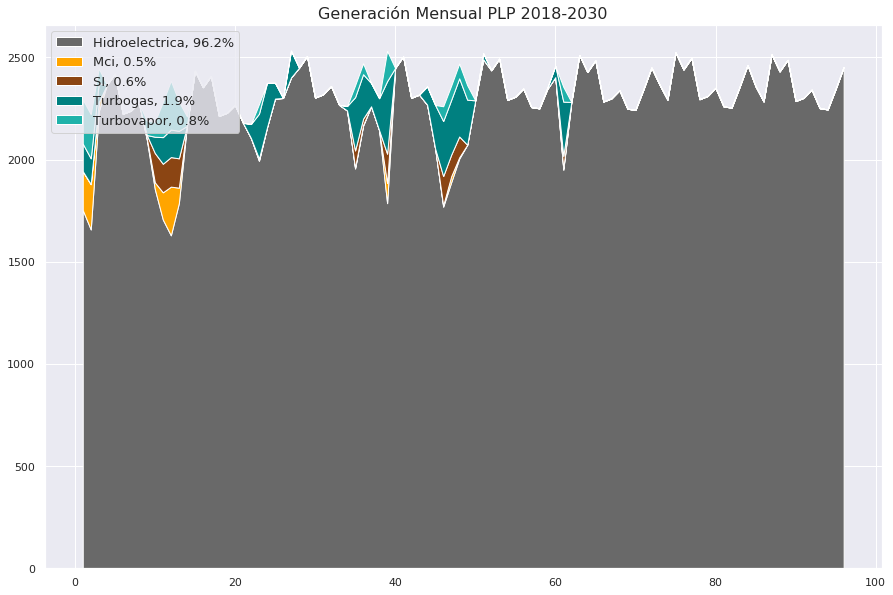

In [22]:

#labels =['Carbon','Gas_Natural','Fuel_Oil','Hidro_Pasada','Hidro_ERNC','Hidro_Embalse','Biomasa','Eolica','Solar']
labels = ['Hidroelectrica','Mci','SI','Turbogas','Turbovapor']
technology=matrix[labels]
sizes1 =technology.sum().tolist()
total=sum(sizes1)
technology['Mes_n']=matrix['Mes_n']
paleta=['dimgrey','orange','saddlebrown','teal','lightseagreen']#,'cyan','green','lime','yellow']
figure(figsize=(15,10))
plt.stackplot('Mes_n','Hidroelectrica','Mci','SI','Turbogas','Turbovapor',data=technology,colors=paleta,labels=labels)

plt.legend(
    loc='upper left',
    labels=['%s, %1.01f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes1)],
    prop={'size': 13},
    bbox_to_anchor=(0.0, 1),
)
plt.title('Generación Mensual PLP 2018-2030',fontsize=16)
pass


In [ ]:
#GENERACION Embalses PLP
tech[tech['cen_type']=='Hidro_Embalse'].groupby('CenNom').sum()

In [ ]:
#GENERACIÓN POTENCIA POR EMBALSES PLP
cen2=pd.merge(cen[['CenPgen','Bloque','cen_type','CenNum','CenNom']],df2[['Bloque','Etapa']],on='Bloque')
gen_emb=cen2[cen2['cen_type']=='Hidro_Embalse'][['CenPgen','CenNum','CenNom','Bloque','Etapa']]
gen_emb=pd.pivot_table(gen_emb,values='CenPgen',index='Etapa',columns='CenNom',aggfunc=np.mean)
labels=gen_emb.columns.tolist()
sns.set()
fig, ax = plt.subplots(nrows=len(labels))
fig.set_size_inches(20,80)
for i in range(len(labels)):
    ax[i].plot(gen_emb.index,gen_emb[labels[i]],label=str(labels[i]))
    ax[i].set_title(str(labels[i]),fontsize=14)
plt.subplots_adjust(wspace=0.8,hspace=0.2),plt.show()
pass
# gen_emb[labels[:2]].plot.line(figsize=(35,15),linewidth=2)


# Generación mensual por tecnología Cheby

In [ ]:
# tech=pd.read_sql_query("SELECT * From 'energy_technology' ",cnx_month)
# tec=tech[tech['scenario_id']==15]
# sr=pd.Series(tech.datetime)
# tech['Mes']=pd.to_datetime(sr).dt.month
# tech['Año']=pd.to_datetime(sr).dt.year
# matrix=pd.pivot_table(tech,values='value',index=['Año','Mes'],columns='label',aggfunc=np.sum)
# matrix=matrix[:-1]
# matrix['Mes_n']=np.arange(1,len(matrix)+1)
# matrix.head()
# # matrix[(50<matrix['Mes_n'] ) & (matrix['Mes_n']<100)]

In [ ]:
# labels =['Carbon','GNL','FuelOil','Pasada','Serie','Embalse','Biomasa','Eolica','Solar']
# paleta=['dimgrey','orange','saddlebrown','teal','lightseagreen','cyan','green','lime','yellow']
# sizes =matrix.sum().tolist()
# total=sum(sizes)
# figure(figsize=(15,10))
# plt.stackplot('Mes_n','Carbon','GNL','FuelOil','Pasada','Serie','Embalse','Biomasa','Eolica','Solar',data=matrix,colors=paleta,labels=labels)

# plt.legend(
#     loc='upper left',
#     labels=['%s, %1.01f%%' % (
#         l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
#     prop={'size': 13},
#     bbox_to_anchor=(0.0, 1),
# )
# plt.title('Generación mensual Cheby RD 2018-2030 USANDO TECH-ENERGY',fontsize=18)
# pass

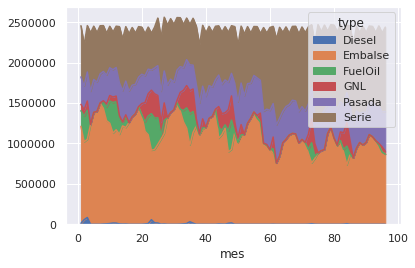

In [30]:
tech=pd.read_csv('generacion_tech_month_mwh_rd.csv')
matrix=pd.pivot_table(tech,values='value',index='mes',columns='type',aggfunc=np.sum)
#labels = ['Hidroelectrica','Mci','SI','Turbogas','Turbovapor']
#technology=matrix[labels]
#paleta=['dimgrey','orange','saddlebrown','teal','lightseagreen']#,'cyan','green','lime','yellow']
#sizes2 =technology.sum().tolist()
#total=sum(sizes2)
#figure(figsize=(15,10))
#plt.stackplot(technology.index,'Hidroelectrica','Mci','SI','Turbogas','Turbovapor',data=matrix,colors=paleta,labels=labels)

#plt.legend(
#    loc='upper left',
#    labels=['%s, %1.01f%%' % (
#        l, (float(s) / total) * 100) for l, s in zip(labels, sizes2)],
#    prop={'size': 13},
#    bbox_to_anchor=(0.0, 1),
#)
#plt.title('Generación mensual Cheby RD 2018-2030',fontsize=18)
#pass
matrix.plot.area()

In [ ]:
#Comparacion por SUMA DE GENERACION ENERGIA TOTAL 2018-2030 PLP-CHEBY
sizes3=[np.round(sizes2[i]/1000,2 ) for i in range(len(sizes2))]
x=pd.DataFrame(list(zip(sizes1,sizes3)),columns=['PLP','CHEBY'],index=labels)
x

In [ ]:
#GENERACION EMBALSES CHEBY
tipo=pd.read_csv('Generator.csv',dtype={"id":object})
tipo=tipo.rename(columns={'id':'label'})
energia=pd.merge(gen,tipo[['label','name','type']],on='label')
energia[(energia['type']=='Embalse') & (energia['scenario_id']==15)].groupby('name').sum()

In [ ]:
###################GENERACIÓN POR EMBALSES CHEBY#############################################

#merge con tipos de generacion
tipo=pd.read_csv('Generator.csv',dtype={"id":object})
tipo=tipo.rename(columns={'id':'label'})
energia=pd.merge(gen,tipo[['label','name','type']],on='label')
#filtrar por hidrologia  y embalses
emb_cheby=energia[(energia['scenario_id']==15) & (energia['type']=='Embalse')]
sr=pd.Series(emb_cheby.datetime)
emb_cheby.loc[:,'Mes']=pd.to_datetime(sr).dt.month
emb_cheby.loc[:,'Año']=pd.to_datetime(sr).dt.year

#llevar los embalses a las columnas
emb_cheby=pd.pivot_table(emb_cheby,values='value',index=['Año','Mes'],columns='name',aggfunc=np.mean)
emb_cheby=emb_cheby[:-1]
emb_cheby.index=np.arange(1,len(emb_cheby)+1)


#####################GENERACIÓN POTENCIA POR EMBALSES PLP#########################################
cen2=pd.merge(cen[['CenPgen','Bloque','cen_type','CenNum','CenNom']],df2[['Bloque','Etapa']],on='Bloque')
gen_emb=cen2[cen2['cen_type']=='Hidro_Embalse'][['CenPgen','CenNum','CenNom','Bloque','Etapa']]
gen_emb=pd.pivot_table(gen_emb,values='CenPgen',index='Etapa',columns='CenNom',aggfunc=np.mean)


#PLOT

sns.set()
labels=emb_cheby.columns.tolist()
fig, ax = plt.subplots(nrows=len(labels))
fig.set_size_inches(20,80)
for i in range(len(labels)):
    ax[i].plot(emb_cheby.index,emb_cheby[labels[i]],label='cheby',color='r',linewidth=2)
    ax[i].plot(gen_emb.index,gen_emb[labels[i]],label='plp',color='b',linewidth=2)
    ax[i].set_title(str(labels[i]),fontsize=14)
    ax[i].legend(loc='upper right')
plt.subplots_adjust(wspace=0.8,hspace=0.2)
plt.show()
pass



## Revisión de Embalses

In [ ]:
# cnx= sqlite3.connect('../Study1_1_10.db')
# #get table names
# res = cnx.execute("SELECT name FROM sqlite_master WHERE type='table';")
# for name in res:
#     print(name[0])
# emb= pd.read_sql_query("SELECT * From 'Waterway.flow_values' ",cnx)
# vol=pd.read_sql_query("SELECT * From 'Reservoir.vol_values' ",cnx)
vol.groupby('label').mean()

In [ ]:
#filtrar por hidrologia
embalse=vol[(vol['scenario_id']==15)]
#filtrar por label 
embalse=embalse[embalse['label']=='1']
#Fecha
sr=pd.Series(embalse.datetime)
embalse.loc[:,'Año']=pd.to_datetime(sr).dt.year
embalse.loc[:,'Mes']=pd.to_datetime(sr).dt.month
# df=pd.pivot_table(embalse,values='value',index=['Año','Mes'],columns='id',aggfunc=np.mean)
embalse=embalse.groupby(['Año','Mes']).mean()
# # df['Mes_n']=np.arange(1,len(df)+1)
sns.set()
embalse['value'].plot(figsize=(15,5),linewidth=3)
plt.title('Volumen Jiguey Cheby',fontsize=18)


In [ ]:
#filtrar por embalse

# embalse=emb[(emb['id']<5) & (emb['id']>2)]
# #Fecha
# embalse.loc[:,'Fecha']=pd.date_range('2018-01-01 01:00:00', periods=len(embalse), freq='H')
# embalse.loc[:,'Año']=embalse.Fecha.dt.year
# embalse.loc[:,'Mes']=embalse.Fecha.dt.month
# df=pd.pivot_table(embalse,values='value',index=['Año','Mes'],columns='id',aggfunc=np.mean)
# # df=embalse.groupby(['Año','Mes']).mean()
# # df['Mes_n']=np.arange(1,len(df)+1)
# sns.set()
# df.plot(figsize=(15,5),linewidth=3)
# plt.title('Waterflow Aguacate')

In [ ]:
df3.head()

In [ ]:
#merge entre plpemb y bloques.csv 
emb=pd.merge(df2[['Bloque','Año','Mes']],df3[['EmbFac','Bloque','EmbVini','EmbNom','EmbNum','Hidro']],on='Bloque')
# df3=df3[(df3['EmbNum']==1) & (df3['Hidro']=='15')]
# emb=df3[['EmbFac','Bloque','EmbVfin','EmbNom','EmbNum','Hidro']]
#filtrar por embalse e hidrologia 
emb=emb[(emb['EmbNum']==1) & (emb['Hidro']==15)]
#promedia el VolFin del embalse por cada año
emb=emb.groupby(['Año','Mes']).mean()
emb['Volf']=emb['EmbVini']*emb['EmbFac']
# emb.index=emb.Bloque
sns.set()
emb['Volf'].plot(figsize=(15,5),linewidth=3)
plt.ylabel('m3'), plt.title(' Vini de Embalse Jiguey PLP', fontsize=18), plt.legend() 
plt.show()


In [ ]:
#CHEBY
#filtrar por hidrologia
embalse=vol[(vol['scenario_id']==15)]
#filtrar por label 
embalse=embalse[embalse['label']=='2']
#Fecha
sr=pd.Series(embalse.datetime)
embalse.loc[:,'Año']=pd.to_datetime(sr).dt.year
embalse.loc[:,'Mes']=pd.to_datetime(sr).dt.month
# df=pd.pivot_table(embalse,values='value',index=['Año','Mes'],columns='id',aggfunc=np.mean)
embalse=embalse.groupby(['Año','Mes']).mean()
# # df['Mes_n']=np.arange(1,len(df)+1)
sns.set()
embalse['value'].plot(figsize=(15,5),linewidth=3)
plt.title('Volumen Aguacate Cheby',fontsize=18)

In [ ]:
#merge entre plpemb y bloques.csv 
emb=pd.merge(df2[['Bloque','Año','Mes']],df3[['EmbFac','Bloque','EmbVfin','EmbNom','EmbNum','Hidro']],on='Bloque')
# df3=df3[(df3['EmbNum']==1) & (df3['Hidro']=='15')]
# emb=df3[['EmbFac','Bloque','EmbVfin','EmbNom','EmbNum','Hidro']]
#filtrar por embalse e hidrologia 
emb=emb[(emb['EmbNum']==2) & (emb['Hidro']==15)]
#promedia el VolFin del embalse por cada año
emb=emb.groupby(['Año','Mes']).mean()
emb['Volf']=emb['EmbVfin']*emb['EmbFac']
# emb.index=emb.Bloque
sns.set()
emb['Volf'].plot(figsize=(15,5),linewidth=3)
plt.ylabel('m3'), plt.title(' Vfin de Embalse Agucate PLP', fontsize=18), plt.legend() 
plt.show()


In [ ]:
#CHEBY
#filtrar por hidrologia
embalse=vol[(vol['scenario_id']==15)]
#filtrar por label 
embalse=embalse[embalse['label']=='3']
#Fecha
sr=pd.Series(embalse.datetime)
embalse.loc[:,'Año']=pd.to_datetime(sr).dt.year
embalse.loc[:,'Mes']=pd.to_datetime(sr).dt.month
# df=pd.pivot_table(embalse,values='value',index=['Año','Mes'],columns='id',aggfunc=np.mean)
embalse=embalse.groupby(['Año','Mes']).mean()
# # df['Mes_n']=np.arange(1,len(df)+1)
sns.set()
embalse['value'].plot(figsize=(15,5),linewidth=3)
plt.title('Volumen Valdesia Cheby',fontsize=18)

In [ ]:
#merge entre plpemb y bloques.csv 
emb=pd.merge(df2[['Bloque','Año','Mes']],df3[['EmbFac','Bloque','EmbVfin','EmbNom','EmbNum','Hidro']],on='Bloque')
# df3=df3[(df3['EmbNum']==1) & (df3['Hidro']=='15')]
# emb=df3[['EmbFac','Bloque','EmbVfin','EmbNom','EmbNum','Hidro']]
#filtrar por embalse e hidrologia 
emb=emb[(emb['EmbNum']==3) & (emb['Hidro']==15)]
#promedia el VolFin del embalse por cada año
emb=emb.groupby(['Año','Mes']).mean()
emb['Volf']=emb['EmbVfin']*emb['EmbFac']
# emb.index=emb.Bloque
sns.set()
emb['Volf'].plot(figsize=(15,5),linewidth=3)
plt.ylabel('m3'), plt.title(' Vfin de Embalse Valdesia PLP', fontsize=18), plt.legend() 
plt.show()

In [ ]:
#CHEBY
#filtrar por hidrologia
embalse=vol[(vol['scenario_id']==15)]
#filtrar por label 
embalse=embalse[embalse['label']=='5']
#Fecha
sr=pd.Series(embalse.datetime)
embalse.loc[:,'Año']=pd.to_datetime(sr).dt.year
embalse.loc[:,'Mes']=pd.to_datetime(sr).dt.month
# df=pd.pivot_table(embalse,values='value',index=['Año','Mes'],columns='id',aggfunc=np.mean)
embalse=embalse.groupby(['Año','Mes']).mean()
# # df['Mes_n']=np.arange(1,len(df)+1)
sns.set()
embalse['value'].plot(figsize=(15,5),linewidth=3)
plt.title('Volumen Las Barias Cheby',fontsize=18)

In [ ]:
#merge entre plpemb y bloques.csv 
emb=pd.merge(df2[['Bloque','Año','Mes']],df3[['EmbFac','Bloque','EmbVfin','EmbNom','EmbNum','Hidro']],on='Bloque')
# df3=df3[(df3['EmbNum']==1) & (df3['Hidro']=='15')]
# emb=df3[['EmbFac','Bloque','EmbVfin','EmbNom','EmbNum','Hidro']]
#filtrar por embalse e hidrologia 
emb=emb[(emb['EmbNum']==5) & (emb['Hidro']==15)]
#promedia el VolFin del embalse por cada año
emb=emb.groupby(['Año','Mes']).mean()
emb['Volf']=emb['EmbVfin']*emb['EmbFac']
# emb.index=emb.Bloque
sns.set()
emb['Volf'].plot(figsize=(15,5),linewidth=3)
plt.ylabel('m3'), plt.title(' Vfin de Embalse Las Barias PLP', fontsize=18), plt.legend() 
plt.show()

In [ ]:
#CHEBY
#filtrar por hidrologia
embalse=vol[(vol['scenario_id']==15)]
#filtrar por label 
embalse=embalse[embalse['label']=='11']
#Fecha
sr=pd.Series(embalse.datetime)
embalse.loc[:,'Año']=pd.to_datetime(sr).dt.year
embalse.loc[:,'Mes']=pd.to_datetime(sr).dt.month
# df=pd.pivot_table(embalse,values='value',index=['Año','Mes'],columns='id',aggfunc=np.mean)
embalse=embalse.groupby(['Año','Mes']).mean()
# # df['Mes_n']=np.arange(1,len(df)+1)
sns.set()
embalse['value'].plot(figsize=(15,5),linewidth=3)
plt.title('Volumen Tavera Cheby',fontsize=18)

In [ ]:
#merge entre plpemb y bloques.csv 
emb=pd.merge(df2[['Bloque','Año','Mes']],df3[['EmbFac','Bloque','EmbVfin','EmbNom','EmbNum','Hidro']],on='Bloque')
# df3=df3[(df3['EmbNum']==1) & (df3['Hidro']=='15')]
# emb=df3[['EmbFac','Bloque','EmbVfin','EmbNom','EmbNum','Hidro']]
#filtrar por embalse e hidrologia 
emb=emb[(emb['EmbNum']==11) & (emb['Hidro']==15)]
#promedia el VolFin del embalse por cada año
emb=emb.groupby(['Año','Mes']).mean()
emb['Volf']=emb['EmbVfin']*emb['EmbFac']
# emb.index=emb.Bloque
sns.set()
emb['Volf'].plot(figsize=(15,5),linewidth=3)
plt.ylabel('m3'), plt.title(' Vfin de Embalse Tavera PLP', fontsize=18), plt.legend() 
plt.show()

In [ ]:
#CHEBY
#filtrar por hidrologia
embalse=vol[(vol['scenario_id']==15)]
#filtrar por label 
embalse=embalse[embalse['label']=='12']
#Fecha
sr=pd.Series(embalse.datetime)
embalse.loc[:,'Año']=pd.to_datetime(sr).dt.year
embalse.loc[:,'Mes']=pd.to_datetime(sr).dt.month
# df=pd.pivot_table(embalse,values='value',index=['Año','Mes'],columns='id',aggfunc=np.mean)
embalse=embalse.groupby(['Año','Mes']).mean()
# # df['Mes_n']=np.arange(1,len(df)+1)
sns.set()
embalse['value'].plot(figsize=(15,5),linewidth=3)
plt.title('Volumen BAO Cheby',fontsize=18)

In [ ]:
#merge entre plpemb y bloques.csv 
emb=pd.merge(df2[['Bloque','Año','Mes']],df3[['EmbFac','Bloque','EmbVfin','EmbNom','EmbNum','Hidro']],on='Bloque')
# df3=df3[(df3['EmbNum']==1) & (df3['Hidro']=='15')]
# emb=df3[['EmbFac','Bloque','EmbVfin','EmbNom','EmbNum','Hidro']]
#filtrar por embalse e hidrologia 
emb=emb[(emb['EmbNum']==12) & (emb['Hidro']==15)]
#promedia el VolFin del embalse por cada año
emb=emb.groupby(['Año','Mes']).mean()
emb['Volf']=emb['EmbVfin']*emb['EmbFac']
# emb.index=emb.Bloque
sns.set()
emb['Volf'].plot(figsize=(15,5),linewidth=3)
plt.ylabel('m3'), plt.title(' Vfin de Embalse BAO PLP', fontsize=18), plt.legend() 
plt.show()

In [ ]:
#CHEBY
#filtrar por hidrologia
embalse=vol[(vol['scenario_id']==15)]
#filtrar por label 
embalse=embalse[embalse['label']=='13']
#Fecha
sr=pd.Series(embalse.datetime)
embalse.loc[:,'Año']=pd.to_datetime(sr).dt.year
embalse.loc[:,'Mes']=pd.to_datetime(sr).dt.month
# df=pd.pivot_table(embalse,values='value',index=['Año','Mes'],columns='id',aggfunc=np.mean)
embalse=embalse.groupby(['Año','Mes']).mean()
# # df['Mes_n']=np.arange(1,len(df)+1)
sns.set()
embalse['value'].plot(figsize=(15,5),linewidth=3)
plt.title('Volumen LopezAngostura Cheby',fontsize=18)

In [ ]:
#merge entre plpemb y bloques.csv 
emb=pd.merge(df2[['Bloque','Año','Mes']],df3[['EmbFac','Bloque','EmbVfin','EmbNom','EmbNum','Hidro']],on='Bloque')
# df3=df3[(df3['EmbNum']==1) & (df3['Hidro']=='15')]
# emb=df3[['EmbFac','Bloque','EmbVfin','EmbNom','EmbNum','Hidro']]
#filtrar por embalse e hidrologia 
emb=emb[(emb['EmbNum']==13) & (emb['Hidro']==15)]
#promedia el VolFin del embalse por cada año
emb=emb.groupby(['Año','Mes']).mean()
emb['Volf']=emb['EmbVfin']*emb['EmbFac']
# emb.index=emb.Bloque
sns.set()
emb['Volf'].plot(figsize=(15,5),linewidth=3)
plt.ylabel('m3'), plt.title(' Vfin de Embalse LopezAngostura PLP', fontsize=18), plt.legend() 
plt.show()